In [ ]:
import pandas as pd

# 加载数据集
file_path = 'dataset/rating_predict.xlsx'
data = pd.read_excel(file_path)

# 显示数据的前几行以了解其结构
data.head()


,score,时长,box_office_category,豆瓣评价人数,获奖,提名,国民总收入亿元,人均国内总产值元,第三产业增加值亿元,国内生产总值亿元,...,others_动画,others_喜剧,others_奇幻,others_恐怖,others_悬疑,others_战争,others_爱情,others_科幻,others_纪录片,others_舞台艺术
0,9.6,110.0,6,1800000,13,10,983751.2,70077.692,535370.99,890304.85,...,1,0,0,0,0,0,0,0,0,0
1,9.5,130.0,4,1700000,23,36,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0
2,9.5,121.0,3,170781,0,0,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0
3,9.5,111.0,3,639625,0,0,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0
4,9.5,120.0,3,15627,4,3,983751.2,70077.692,535370.99,890304.85,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# 检查数据集中的缺失值
missing_values = data.isnull().sum()
missing_values[missing_values > 0]


Series([], dtype: int64)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# 分离特征和目标变量
X = data.drop('score', axis=1)
y = data['score']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型并训练
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 预测测试集
y_pred = lr_model.predict(X_test)

# 计算MSE和R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出MSE和R²
mse, r2


(0.762038483909651, 0.2630607889737966)

In [14]:
# 获取特征重要性
feature_importances = rf_regressor.feature_importances_

# 将特征重要性与特征名称组合，并按重要性排序
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# 显示特征重要性
features.head(10)  # 展示前10个最重要的特征

,Feature,Importance
2,豆瓣评价人数,0.306827
1,box_office_category,0.155205
0,时长,0.076114
36,others_恐怖,0.064918
16,咨询指数日均值,0.054749
15,搜索指数移动日均值,0.038724
14,演员百度指数,0.035422
4,提名,0.033323
3,获奖,0.023331
37,others_悬疑,0.019620


F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 23454 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 38469 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 20540 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 39044 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
F:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 23454 missing from c

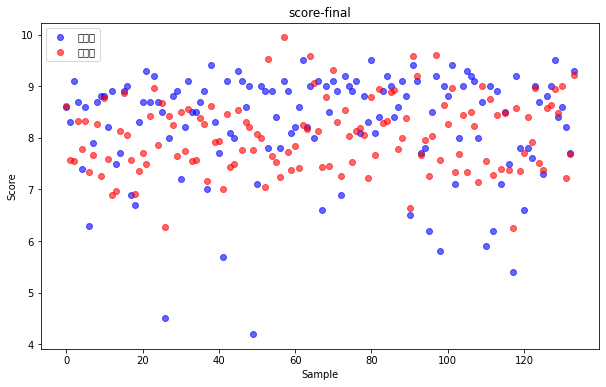

In [15]:
# 绘制预测值与实际值的比较图
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='实际值', alpha=0.6)
plt.scatter(range(len(y_pred)), y_pred, color='red', label='预测值', alpha=0.6)
plt.xlabel('Sample')
plt.ylabel('Score')
plt.title('score-final')
plt.legend()
plt.show()